# EDA - Car Insurance Claim Data

This is a project in which I use _Car Insurance Claim_ Dataset from Kaggle to generate some insights about car insurance claims and see what factors will make customers more likely to be 'repeat'. First, I clean the data and create some new features using pandas. Then I create visualizations of said data using matplotlib and seaborn. Finally, I apply machine learning models (sklearn) to predict which customers will make repeat insurance claims. Tasks include:

### Data Preprocessing:
- Create target variable 'repeat'
- Convert data types to numeric 
- Remove unnecessary columns
- Fill in and/or remove null values
- Clean up messy string data entries
- Export cleaned csv file

### Exploratory Data Analysis:
- Create visualizations to determine what attributes lead to repeat insurance claims
- Make use of matplotlib and seaborn to create graphs that are easy to understand
- Separate numerical variables into categorical data for plotting
- Use visualizations to determine whether or not a variable is suitable for our ML model


- Create target variable and feature dataframe
- Convert categorical data types to numeric
- Split dataset into training and test data


### Final product is a model which takes in # of Demerit Points, Age, Car Crash Status, and Urbanicity and predicts with 75.35% accuracy whether a customer will make more than one insurance claim.

In [70]:
#!pip install plotly
#!pip install chart_studio


##  Imports

In [71]:
# import data processing and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline




##  Data Preprocessing

In [72]:
# import our csv data as df and take a look
df = pd.read_csv('D:\Data Analysis\Databases\car_insurance_claim_data.csv')
df1= pd.read_csv('D:\Data Analysis\Databases\car_insurance_claim_data.csv')
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


## Q-1 view the columns

In [73]:
#view the columns of the dataframe to get a feel for the data
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

What do these columns represent? Here's a table describing each variable:

| Column name | Description                               |
|-------------|-------------------------------------------|
| ID          | Customer ID Number                        |
| KIDSDRIV    | # of children (teenagers) driving the car |
| BIRTH       | Date of birth                             |
| AGE         | Age of driver                             |
| HOMEKIDS    | # of children at home                     |
| YOJ         | Years on job                              |
| INCOME      | Income                                    |
| PARENT1     | Single parent y/n                         |
| HOME_VAL    | Value of home                             |
| MSTATUS     | Marital status                            |
| GENDER      | Gender                                    |
| EDUCATION   | Maximum education level                   |
| OCCUPATION  | Occupation                                |
| TRAVTIME    | Distance to work                          |
| CAR_USE     | Vehicle use                               |
| BLUEBOOK    | Value of vehicle                          |
| TIF         | Time in force                             |
| CAR_TYPE    | Type of car                               |
| RED_CAR     | Red car y/n                               |
| OLDCLAIM    | Payouts, last 5 years                     |
| CLM_FREQ    | # of claims, last 5 years                 |
| REVOKED     | License revoked past 7 years y/n          |
| MVR_PTS     | Motor vehicle record points (demerits)    |
| CLM_AMT     | Claim amount                              |
| CAR_AGE     | Vehicle age                               |
| CLAIM_FLAG  | Was car in a crash y/n                    |
| URBANICITY  | Home/work area                            |

To simplify our data and save some memory, I'm going to drop the ID column because it doesn't represent any relevant information.

In [74]:
df.shape

(10302, 27)

In [75]:
df = df.drop(labels='ID', axis=1)

Since every customer in this dataset has made a claim, it'll be hard to draw conclusions from the data as is. Instead, I'm going to use the information in the CLM_FREQ column to create a target variable: if a customer has had 1 or more claims in the past 5 years, we'll call them a "repeat offender". Then we can use the rest of the data to see which customer attributes lead to them becoming repeat offenders.

In [76]:
df.CLM_FREQ.value_counts()

0    6292
2    1492
1    1279
3     992
4     225
5      22
Name: CLM_FREQ, dtype: int64

## Q-2 CREATE A NEW COLOUMN CALLED REPEAT

In [77]:
# creating a new 'repeat offender' column: 1 if they have had 1 or more claims in the last 5 years, 0 if not.
df['REPEAT'] = df.CLM_FREQ.apply(lambda x: 0 if x == 0 else 1)

## Q-3 First 20 rows

In [78]:
df.head(20)

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
0,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban,1
1,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban,0
2,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban,0
3,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban,1
4,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban,0
5,0,17MAY49,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,...,no,"$19,217",2,Yes,3,$0,17.0,0,Highly Urban/ Urban,1
6,0,05MAY65,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,...,no,$0,0,No,0,"$2,946",7.0,1,Highly Urban/ Urban,0
7,0,28FEB45,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,...,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban,0
8,1,17SEP59,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,...,no,"$3,295",1,No,2,"$6,477",1.0,1,Highly Urban/ Urban,1
9,0,21AUG55,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,...,no,$0,0,No,0,$0,10.0,0,z_Highly Rural/ Rural,0


## Q-4 check the data types

In [79]:
# overview of datatypes in each column
df.dtypes

KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
REPEAT          int64
dtype: object

As we can see above, we have some columns which should be represented numerically but are currently in string form. We'll convert the contents of these columns to numeric so we have them in the correct form for analysis later. In this dataset, these columns seem to be all of the variables represented by dollar values. These columns are: income, home value, bluebook value, claim amount, and old claim (payouts, last 5 years). I'll create a function called to_numeric that will take care of this for us.

## Q-5 Create function convert string to numeric

In [80]:
# takes a list of column names and a df and performs the following, in place, on the dataframe (doesn't return anything):
# converts to string to prevent any type errors
# removes dollar signs and comma from dollar values
# converts result to numeric using pandas
def to_numeric(list_of_columns, df=df):
    for i in list_of_columns:
        df[i] = df[i].astype(str)
        df[i] = df[i].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',',''))
        df[i] = pd.to_numeric(df[i], errors = 'coerce')


In [81]:
list_of_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'CLM_AMT', 'OLDCLAIM']
to_numeric(list_of_cols)

In [82]:
df[list_of_cols].dtypes

INCOME      float64
HOME_VAL    float64
BLUEBOOK      int64
CLM_AMT       int64
OLDCLAIM      int64
dtype: object

The 5 columns were converted to numeric datatypes and are ready for analysis later. Next, we'll check for null values:

In [83]:
df.dtypes

KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK        int64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM        int64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT         int64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
REPEAT          int64
dtype: object

## Q-6 Check the null values

In [84]:
# check for null values
df.isnull().sum()

KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
REPEAT          0
dtype: int64

Every column containing null values is a numeric column, except OCCUPATION. Looking at the dataframe below, it seems that having no information for occupation doesn't affect the data in the rest of the columns. So we'll leave the occupation column alone.

In [85]:
df[df.OCCUPATION.isnull()].head()

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
16,0,19JUL46,53.0,0,11.0,130795.0,No,0.0,z_No,M,...,yes,0,0,No,3,1267,10.0,1,Highly Urban/ Urban,0
40,0,28SEP58,41.0,0,7.0,92842.0,No,286113.0,z_No,M,...,no,1431,2,No,5,0,15.0,0,Highly Urban/ Urban,1
45,0,01JUN56,43.0,2,17.0,145353.0,No,418785.0,Yes,z_F,...,no,0,0,No,0,0,15.0,0,Highly Urban/ Urban,0
77,0,05SEP50,49.0,0,9.0,NaN,No,0.0,z_No,M,...,no,34351,2,Yes,2,0,18.0,0,Highly Urban/ Urban,1
80,0,01JAN53,46.0,0,14.0,NaN,No,397661.0,z_No,M,...,yes,0,0,Yes,1,0,12.0,0,Highly Urban/ Urban,0


In [86]:
df1.OCCUPATION.value_counts() #testing purpose

z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

In [87]:
df.OCCUPATION.describe()

count              9637
unique                8
top       z_Blue Collar
freq               2288
Name: OCCUPATION, dtype: object

## Q-7 Occupation fill with Blue collar

In [88]:
df["OCCUPATION"].fillna("Blue Collar")

0         Professional
1        z_Blue Collar
2              Manager
3             Clerical
4        z_Blue Collar
             ...      
10297          Manager
10298      Blue Collar
10299    z_Blue Collar
10300       Home Maker
10301         Clerical
Name: OCCUPATION, Length: 10302, dtype: object

In [89]:
df.OCCUPATION.value_counts().unique
###doubt about Blue collar is not coming only z_Blue collar is coming

<bound method Series.unique of z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64>

In [90]:
df.OCCUPATION.value_counts()

z_Blue Collar    2288
Clerical         1590
Professional     1408
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: OCCUPATION, dtype: int64

In [91]:
df.OCCUPATION.isnull().sum()

665

As for the numeric columns, it is possible for their value to truly be 0. For example, if the customer did not have a job or own a house, then their income or their home value would be $0. For this reason, I won't replace all null values with 0. Instead, I'll replace the null values in each column with the mean of that column.

In [92]:
df.isnull().sum()

KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
REPEAT          0
dtype: int64

In [93]:
df.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,REPEAT
count,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550,0.389245
std,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177,0.487603
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000,1.000000


## Q-8 CORRILATION 

In [94]:
df.corr()["REPEAT"].sort_values()
#df.corr()["Churn"].sort_values()
#a=df.corr()

HOME_VAL     -0.109571
INCOME       -0.065192
AGE          -0.051500
BLUEBOOK     -0.047690
CAR_AGE      -0.028223
TIF          -0.023437
YOJ          -0.022043
TRAVTIME      0.000165
KIDSDRIV      0.045657
HOMEKIDS      0.054400
CLM_AMT       0.135553
CLAIM_FLAG    0.249502
MVR_PTS       0.469767
OLDCLAIM      0.578637
CLM_FREQ      0.869136
REPEAT        1.000000
Name: REPEAT, dtype: float64

### Q-8 Mean values

In [95]:
df.mean()

KIDSDRIV           0.169288
AGE               44.837397
HOMEKIDS           0.720443
YOJ               10.474062
INCOME         61572.073263
HOME_VAL      154523.018608
TRAVTIME          33.416424
BLUEBOOK       15659.923316
TIF                5.329159
OLDCLAIM        4033.977868
CLM_FREQ           0.800718
MVR_PTS            1.710153
CLM_AMT         1511.266453
CAR_AGE            8.298148
CLAIM_FLAG         0.266550
REPEAT             0.389245
dtype: float64

### Q-9 Fill the null values with mean

In [96]:
df = df.fillna(df.mean())

In [97]:
df.isnull().sum()

KIDSDRIV        0
BIRTH           0
AGE             0
HOMEKIDS        0
YOJ             0
INCOME          0
PARENT1         0
HOME_VAL        0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE         0
CLAIM_FLAG      0
URBANICITY      0
REPEAT          0
dtype: int64

In [98]:
df

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
0,0,16MAR39,60.0,0,11.0,67349.000000,No,0.0,z_No,M,...,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban,1
1,0,21JAN56,43.0,0,11.0,91449.000000,No,257252.0,z_No,M,...,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban,0
2,0,18NOV51,48.0,0,11.0,52881.000000,No,0.0,z_No,M,...,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban,0
3,0,05MAR64,35.0,1,10.0,16039.000000,No,124191.0,Yes,z_F,...,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban,1
4,0,05JUN48,51.0,0,14.0,61572.073263,No,306251.0,Yes,M,...,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,13AUG54,45.0,2,9.0,164669.000000,No,386273.0,Yes,M,...,no,0,0,No,2,0,17.0,0,Highly Urban/ Urban,0
10298,0,17JUN53,46.0,0,9.0,107204.000000,No,332591.0,Yes,M,...,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban,0
10299,0,18JUN51,48.0,0,15.0,39837.000000,No,170611.0,Yes,z_F,...,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban,0
10300,0,12DEC48,50.0,0,7.0,43445.000000,No,149248.0,Yes,z_F,...,no,0,0,No,0,0,11.0,0,Highly Urban/ Urban,0


### Q-10 Clean the data which contain z_

Null values taken care of. Next, we'll clean some of the columns that have a strange 'z_' before their data (see Education column above, for example). After some exploration, I found that there was 1 value in each of the following columns with the 'z_' suffix, so I replaced each of those values with the proper value using lambda functions.

In [99]:
df.MSTATUS = df.MSTATUS.apply(lambda x: 'No' if x == 'z_No' else x)
df.GENDER = df.GENDER.apply(lambda x: 'F' if x == 'z_F' else x)
df.EDUCATION = df.EDUCATION.apply(lambda x: 'High School' if x == 'z_High School' else x)
df.OCCUPATION = df.OCCUPATION.apply(lambda x: 'Blue Collar' if x == 'z_Blue Collar' else x)
df.CAR_TYPE = df.CAR_TYPE.apply(lambda x: 'SUV' if x == 'z_SUV' else x)
df.URBANICITY = df.URBANICITY.apply(lambda x: 'Highly Rural/ Rural' if x == 'z_Highly Rural/ Rural' else x)

In [100]:
df

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
0,0,16MAR39,60.0,0,11.0,67349.000000,No,0.0,No,M,...,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban,1
1,0,21JAN56,43.0,0,11.0,91449.000000,No,257252.0,No,M,...,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban,0
2,0,18NOV51,48.0,0,11.0,52881.000000,No,0.0,No,M,...,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban,0
3,0,05MAR64,35.0,1,10.0,16039.000000,No,124191.0,Yes,F,...,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban,1
4,0,05JUN48,51.0,0,14.0,61572.073263,No,306251.0,Yes,M,...,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,13AUG54,45.0,2,9.0,164669.000000,No,386273.0,Yes,M,...,no,0,0,No,2,0,17.0,0,Highly Urban/ Urban,0
10298,0,17JUN53,46.0,0,9.0,107204.000000,No,332591.0,Yes,M,...,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban,0
10299,0,18JUN51,48.0,0,15.0,39837.000000,No,170611.0,Yes,F,...,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban,0
10300,0,12DEC48,50.0,0,7.0,43445.000000,No,149248.0,Yes,F,...,no,0,0,No,0,0,11.0,0,Highly Urban/ Urban,0


In [101]:
df.REPEAT

0        1
1        0
2        0
3        1
4        0
        ..
10297    0
10298    0
10299    0
10300    0
10301    0
Name: REPEAT, Length: 10302, dtype: int64

In [102]:
df.URBANICITY

0        Highly Urban/ Urban
1        Highly Urban/ Urban
2        Highly Urban/ Urban
3        Highly Urban/ Urban
4        Highly Urban/ Urban
                ...         
10297    Highly Urban/ Urban
10298    Highly Urban/ Urban
10299    Highly Urban/ Urban
10300    Highly Urban/ Urban
10301    Highly Rural/ Rural
Name: URBANICITY, Length: 10302, dtype: object

### Q-11 update the URBANCITY coloumn with last 5 characters

In [103]:
# Update urbanicity values to be more readable
df['URBANICITY'] = df.URBANICITY.apply(lambda x: x[-5:])

In [104]:
df.URBANICITY

0        Urban
1        Urban
2        Urban
3        Urban
4        Urban
         ...  
10297    Urban
10298    Urban
10299    Urban
10300    Urban
10301    Rural
Name: URBANICITY, Length: 10302, dtype: object

In [105]:
df.URBANICITY.value_counts()

Urban    8230
Rural    2072
Name: URBANICITY, dtype: int64

In [106]:
df.columns

Index(['KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY', 'REPEAT'],
      dtype='object')

### Q-12 CLEANED DATA SET

In [107]:
# our cleaned dataset!
df

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,REPEAT
0,0,16MAR39,60.0,0,11.0,67349.000000,No,0.0,No,M,...,yes,4461,2,No,3,0,18.0,0,Urban,1
1,0,21JAN56,43.0,0,11.0,91449.000000,No,257252.0,No,M,...,yes,0,0,No,0,0,1.0,0,Urban,0
2,0,18NOV51,48.0,0,11.0,52881.000000,No,0.0,No,M,...,yes,0,0,No,2,0,10.0,0,Urban,0
3,0,05MAR64,35.0,1,10.0,16039.000000,No,124191.0,Yes,F,...,no,38690,2,No,3,0,10.0,0,Urban,1
4,0,05JUN48,51.0,0,14.0,61572.073263,No,306251.0,Yes,M,...,yes,0,0,No,0,0,6.0,0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,13AUG54,45.0,2,9.0,164669.000000,No,386273.0,Yes,M,...,no,0,0,No,2,0,17.0,0,Urban,0
10298,0,17JUN53,46.0,0,9.0,107204.000000,No,332591.0,Yes,M,...,no,0,0,No,0,0,1.0,0,Urban,0
10299,0,18JUN51,48.0,0,15.0,39837.000000,No,170611.0,Yes,F,...,no,0,0,No,0,0,1.0,0,Urban,0
10300,0,12DEC48,50.0,0,7.0,43445.000000,No,149248.0,Yes,F,...,no,0,0,No,0,0,11.0,0,Urban,0


In [108]:
df.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,REPEAT
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550,0.389245
std,0.506512,8.603520,1.116323,3.998154,46125.509765,125531.029634,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.534371,0.442177,0.487603
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,29164.750000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,57084.000000,154523.018608,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.298148,0.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,83231.750000,233085.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000,1.000000


### Q-13 Export this cleaned dataset to a csv called cleaned_car_data:

Export this cleaned dataset to a csv called cleaned_car_data:

In [109]:
# Writing to a CSV file
df.to_csv('cleaned_car_data.csv', index=False)

### Q-14 Read the data from the cleaned dataset

In [110]:
# read in our data
df = pd.read_csv('cleaned_car_data.csv')

In [111]:
df.corr()["REPEAT"].sort_values()

HOME_VAL     -0.106391
INCOME       -0.063362
AGE          -0.051479
BLUEBOOK     -0.047690
CAR_AGE      -0.027331
TIF          -0.023437
YOJ          -0.021444
TRAVTIME      0.000165
KIDSDRIV      0.045657
HOMEKIDS      0.054400
CLM_AMT       0.135553
CLAIM_FLAG    0.249502
MVR_PTS       0.469767
OLDCLAIM      0.578637
CLM_FREQ      0.869136
REPEAT        1.000000
Name: REPEAT, dtype: float64

In [112]:
df.columns

Index(['KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY', 'REPEAT'],
      dtype='object')

In [113]:
feature = df.iloc[:,0:26]
target = df["REPEAT"]


### Q-16 HEATMAP

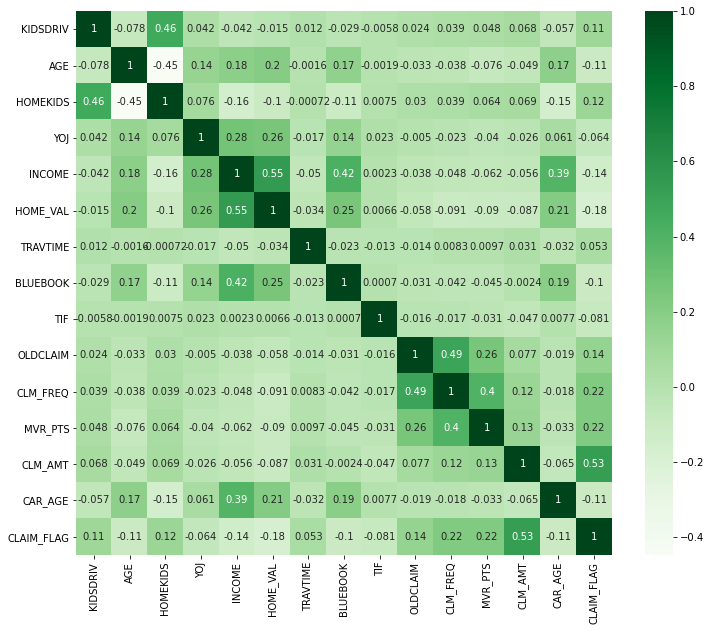

In [114]:
import seaborn as sns
plt.figure(figsize=(12,10))

sns.heatmap(feature.corr(),annot=True,cmap ="Greens")#plt.cm.CMRmap_r)
plt.show()

### Q-17 Partial Correlation

In [115]:
def part_correlation(dataset,thresh):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thresh:
                column = corr_matrix.columns[i]
                col_corr.add(column)
    return col_corr

In [116]:
part_correlation(feature,0.5) ####doubt

{'CLAIM_FLAG', 'HOME_VAL'}

### Q-18 Analyse the Column Repeat (Target)

Our target variable of interest: whether or not customers have made repeat claims. This variable is recorded in the form of a 0 if they have made 1 claim in the past five years, and a 1 if they have made more than 1 claim in the past five years.

In [117]:
REP = df["REPEAT"].value_counts()
REP

0    6292
1    4010
Name: REPEAT, dtype: int64

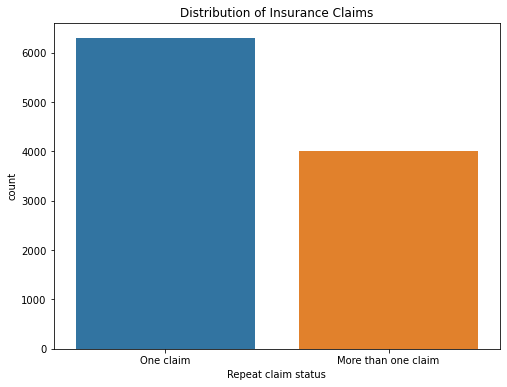

In [118]:
figure(figsize=(8,6))
sns.countplot(x='REPEAT',data=df)
plt.xlabel('Repeat claim status')
plt.xticks([0,1],labels=['One claim','More than one claim'])
plt.title('Distribution of Insurance Claims')
plt.show()

More customers in this database are first-time offenders than repeat offenders by about 2000 claims. Repeat offenders make up about 38.9% of this set of claims.

In [119]:
REP = df["REPEAT"].value_counts()
REP

0    6292
1    4010
Name: REPEAT, dtype: int64

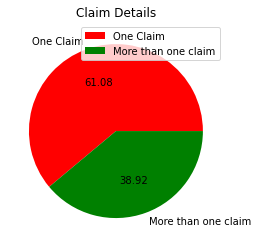

In [120]:
plt.pie(REP,colors= ["red","green"],labels=["One Claim","More than one claim"],autopct = "%0.2f")
plt.title("Claim Details")
plt.legend(loc="upper right")
plt.show()

### Q-19 Gender
Does gender have any influence on our target variable?

How many Male drivers made repeat claims?
39.02%
How many Female drivers made repeat claims?
38.85%


C:\Users\Linu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



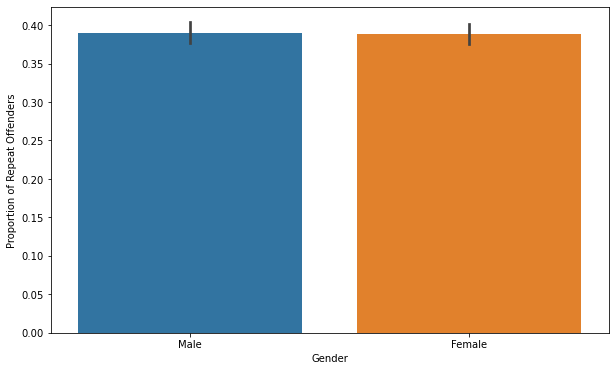

In [121]:
print("How many Male drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["GENDER"] == 'M'].value_counts(normalize = True)[1]))

print("How many Female drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["GENDER"]== 'F'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(df.GENDER, df.REPEAT)
plt.xlabel('Gender')
plt.xticks([0,1],labels=['Male','Female'])
plt.ylabel("Proportion of Repeat Offenders")
plt.show()


Interestingly, gender seems to have almost zero effect on whether or not a customer will make more than one claim.

###  Q-20  Urbanicity
If a customer lives in the city, are they more likely to be a repeat offender?

How many Urban drivers made repeat claims?
45.66%
How many Rural drivers made repeat claims?
12.16%


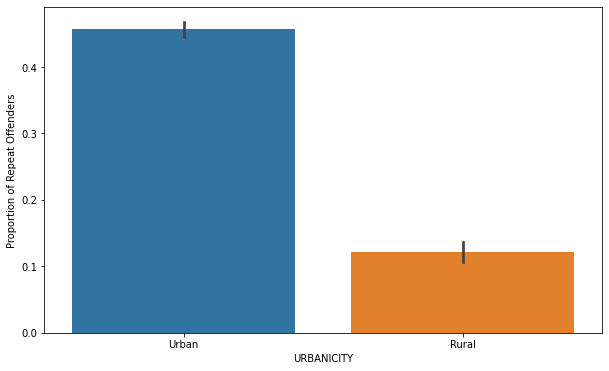

In [123]:
print("How many Urban drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["URBANICITY"] == 'Urban'].value_counts(normalize = True)[1]))

print("How many Rural drivers made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["URBANICITY"] == 'Rural'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='URBANICITY',y='REPEAT', data=df)
plt.ylabel("Proportion of Repeat Offenders")
plt.show()


In [125]:
import plotly.express as px
##df = px.data.tips()
#fig = px.pie(df, a='tip', b='day', color_discrete_sequence=px.colors.sequential.RdBu)
#fig.show()

random_x = df.URBANICITY
names = df.REPEAT
  
fig = px.pie(values=random_x, names=names)
fig.show()

We can see that Urban drivers have a much higher probability of becoming repeat offenders than those who live in Rural areas. The plots above and below show that 45.66% of all Urban drivers have made repeat claims, and that Urban drivers make up a whopping 93.7% of all repeat claims!

That is, if the client lives in the city, there's about a 45% chance that they've made more than one car insurance claim.

Further, if they've made more than one car insurance claim, there's a 93.7% chance that they live in the city!

### Demerit Points
Two questions:
- If a customer has one or more demerit points on their record, are they more likely to be a repeat offender?
- Does the likelihood of being a repeat offender increase with the number of demerit points?

How many drivers without demerits made repeat claims?
22.03%
How many drivers with demerits made repeat claims?
52.87%


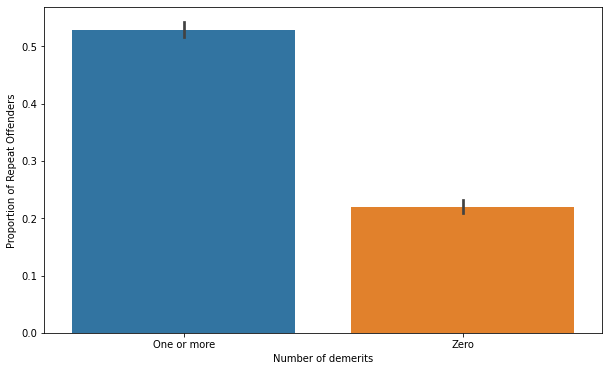

In [126]:
# we need to create a column which represents clients with 0 demerit points, and those with 1 or more.
df['DEMERITS'] = df.MVR_PTS.apply(lambda x: 'Zero' if x == 0 else 'One or more')

print("How many drivers without demerits made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["DEMERITS"] == 'Zero'].value_counts(normalize = True)[1]))

print("How many drivers with demerits made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["DEMERITS"] == 'One or more'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='DEMERITS',y="REPEAT", data=df)
plt.xlabel('Number of demerits')
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Not surprisingly, if a driver has demerit points on their record, they're much more likely to have more than one insurance claim! Now, does the likelihood of repeat claims increase with the actual number of demerit points?

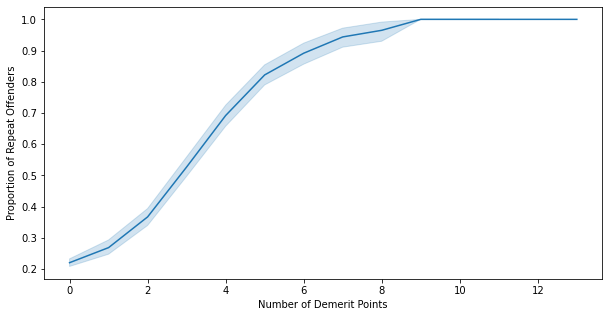

In [127]:
figure(figsize=(10,5))
sns.lineplot(x="MVR_PTS",y="REPEAT",data=df)
plt.xlabel("Number of Demerit Points")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

A clear pattern can be seen in the plot above! As the number of demerits a driver has increases, so do the odds that they will make repeat insurance claims. In fact, for those with 9 demerit points or more, **100% of them** have made more than one claim in the past 5 years!

### Age
To observe whether one age group has an increased likelihood compared to another, I'll have to sort the customers into age groups:
- 16-22 
- 22-30
- 30-40
- 40-50
- 50-60
- 60+


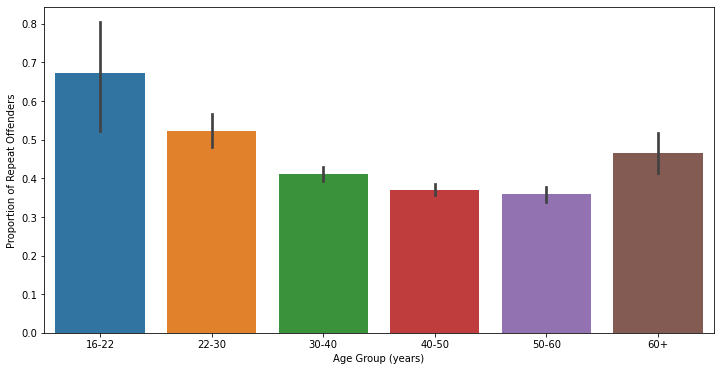

In [128]:
# sort customers into age groups
df['AGEGROUP'] = pd.cut(df["AGE"], bins = [16, 22, 30, 40, 50, 60, np.inf], labels = ['16-22', '22-30', '30-40', '40-50', '50-60', '60+'])
figure(figsize=(12,6))
sns.barplot(x='AGEGROUP',y="REPEAT", data=df)
plt.xlabel("Age Group (years)")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Younger drivers, those in the age group of either 16-22 or 22-30, are at the highest risk of making repeat insurance claims.

### Income
This step also requires some feature engineering: I'll sort each customer into an income bracket before visualizing the data.

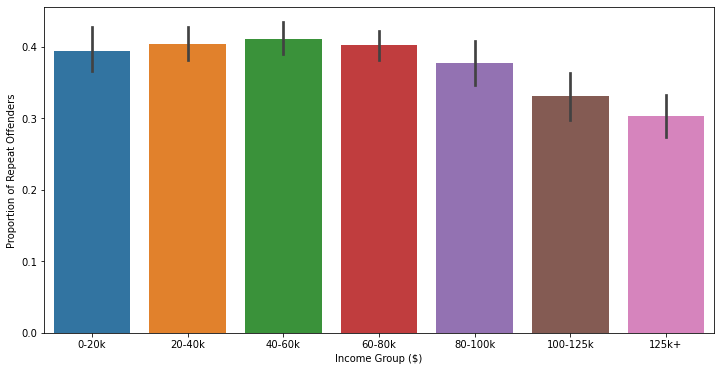

In [129]:
# sort customers into income groups
df['INCOMEGROUP'] = pd.cut(df["INCOME"], bins = [0, 20000, 40000, 60000, 80000, 100000, 125000, np.inf], labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-125k', '125k+'])

figure(figsize=(12,6))
sns.barplot(x='INCOMEGROUP',y="REPEAT", data=df)
plt.xlabel("Income Group ($)")
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Income doesn't seem to have a huge effect on the likelihood of repeat offenses, other than a small dip after income surpasses $100,000.

### License Revoked?
I would expect those drivers who've had their license revoked in the past seven years to drive more dangerously, and thus lead to an increase in repeat claims.

How many drivers who've had their license revoked made repeat claims?
48.69%
How many drivers who haven't had their license revoked made repeat claims?
37.56%


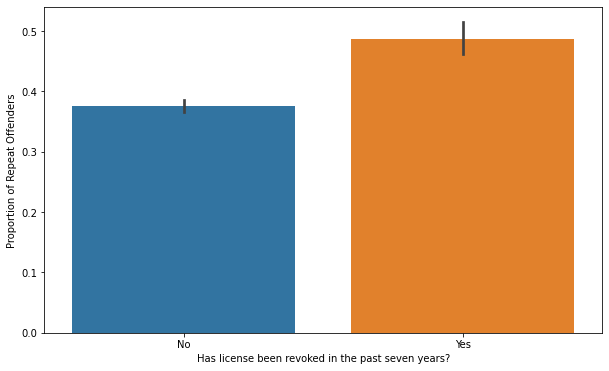

In [130]:
print("How many drivers who've had their license revoked made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["REVOKED"] == 'Yes'].value_counts(normalize = True)[1]))

print("How many drivers who haven't had their license revoked made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["REVOKED"] == 'No'].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='REVOKED',y="REPEAT", data=df)
plt.xlabel('Has license been revoked in the past seven years?')
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

It's true. Drivers who've had their license revoked recently have a greater chance of being repeat offenders.

### Was vehicle in a crash?
CLAIM_FLAG tells us whether or not the car was in a crash for this particular insurance claim.

How many drivers whose car was in a crash made repeat claims?
59.10%
How many drivers whose car wasn't in a crash made repeat claims?
31.59%


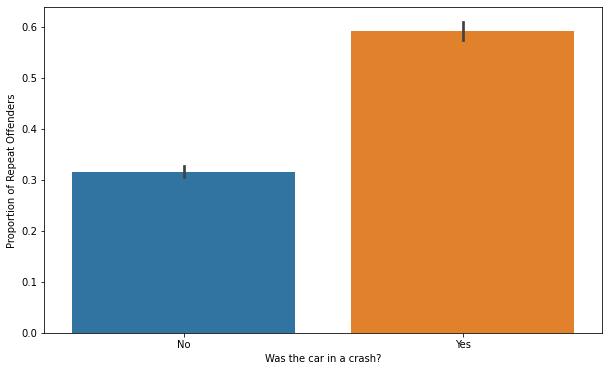

In [131]:
print("How many drivers whose car was in a crash made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["CLAIM_FLAG"] == 1].value_counts(normalize = True)[1]))

print("How many drivers whose car wasn't in a crash made repeat claims?")
print("{:.2%}".format(df["REPEAT"][df["CLAIM_FLAG"] == 0].value_counts(normalize = True)[1]))
figure(figsize=(10,6))
sns.barplot(x='CLAIM_FLAG',y="REPEAT", data=df)
plt.xlabel('Was the car in a crash?')
plt.xticks([0,1],labels=['No','Yes'])
plt.ylabel("Proportion of Repeat Offenders")
plt.show()

Whether or not the car was in a crash for this particular insurance claim seems to have a large effect on whether or not the driver made repeat claims - 59% vs 32%!

## Part 4: Machine Learning Models
The features which have had the most effect on the likelihood of repeat insurance claims were discovered above. Those are:
- Urbanicity (Boolean)
- Number of Demerit Points(MVR_PTS)
- Age 
- Revoked License Status (Boolean)
- Car Crash Status (Boolean)(CLAIM_FLAG)

Our prediction target is the variable REPEAT.

In [133]:
y = df.REPEAT

In [134]:
y.value_counts()

0    6292
1    4010
Name: REPEAT, dtype: int64

In [135]:
df['REVOKED'].value_counts()

No     9041
Yes    1261
Name: REVOKED, dtype: int64

In [142]:
# convert feature columns to numerical variables
#df['URBANICITY'] = df.URBANICITY.apply(lambda x: 0 if x == 'Rural' else 1)
#df['REVOKED'] = df.REVOKED.apply(lambda x: 0 if x == 'No' else 1)
#or
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["URBANICITY"] = le.fit_transform(df["URBANICITY"])


In [147]:
le = LabelEncoder()
df["REVOKED"] = le.fit_transform(df["REVOKED"])

In [148]:
df["URBANICITY"].value_counts()

1    8230
0    2072
Name: URBANICITY, dtype: int64

In [149]:
#Label Encoder
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["URBANICITY"] = le.fit_transform(df["URBANICITY"])

In [150]:
df1["URBANICITY"].value_counts()

1    8230
0    2072
Name: URBANICITY, dtype: int64

In [151]:
df.dtypes

KIDSDRIV          int64
BIRTH            object
AGE             float64
HOMEKIDS          int64
YOJ             float64
INCOME          float64
PARENT1          object
HOME_VAL        float64
MSTATUS          object
GENDER           object
EDUCATION        object
OCCUPATION       object
TRAVTIME          int64
CAR_USE          object
BLUEBOOK          int64
TIF               int64
CAR_TYPE         object
RED_CAR          object
OLDCLAIM          int64
CLM_FREQ          int64
REVOKED           int32
MVR_PTS           int64
CLM_AMT           int64
CAR_AGE         float64
CLAIM_FLAG        int64
URBANICITY        int64
REPEAT            int64
DEMERITS         object
AGEGROUP       category
INCOMEGROUP    category
dtype: object

In [154]:
df.corr()["REPEAT"].sort_values()

HOME_VAL     -0.106391
INCOME       -0.063362
AGE          -0.051479
BLUEBOOK     -0.047690
CAR_AGE      -0.027331
TIF          -0.023437
YOJ          -0.021444
TRAVTIME      0.000165
KIDSDRIV      0.045657
HOMEKIDS      0.054400
REVOKED       0.074811
CLM_AMT       0.135553
CLAIM_FLAG    0.249502
URBANICITY    0.275406
MVR_PTS       0.469767
OLDCLAIM      0.578637
CLM_FREQ      0.869136
REPEAT        1.000000
Name: REPEAT, dtype: float64

In [155]:
def part_correlation(dataset,thresh):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thresh:
                column = corr_matrix.columns[i]
                col_corr.add(column)
    return col_corr

In [156]:
part_correlation(df,0.5)

{'CLAIM_FLAG', 'HOME_VAL', 'REPEAT'}

### Q-Finalize the feature

In [184]:
feature = ['URBANICITY', 'MVR_PTS', 'AGE', 'REVOKED', 'CLAIM_FLAG']

In [185]:
X = df[feature]

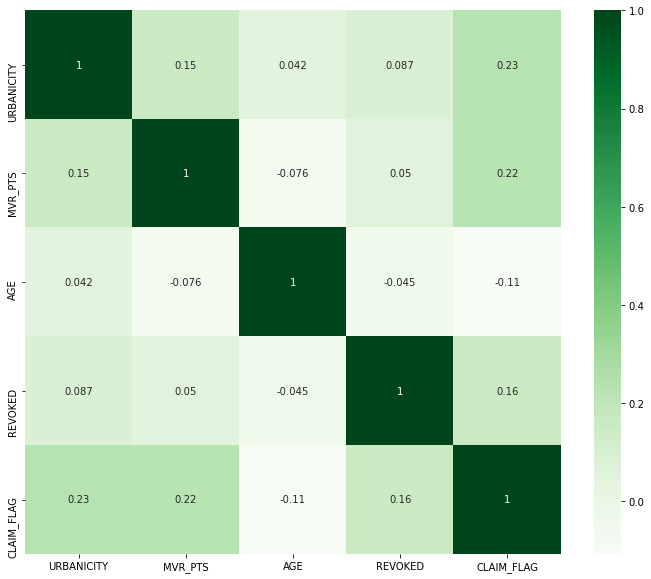

In [186]:
import seaborn as sns
plt.figure(figsize=(12,10))

sns.heatmap(X.corr(),annot=True,cmap ="Greens")#plt.cm.CMRmap_r)
plt.show()

In [187]:
y = df.REPEAT


In [188]:
X

,URBANICITY,MVR_PTS,AGE,REVOKED,CLAIM_FLAG
0,1,3,60.0,0,0
1,1,0,43.0,0,0
2,1,2,48.0,0,0
3,1,3,35.0,0,0
4,1,0,51.0,0,0
...,...,...,...,...,...
10297,1,2,45.0,0,0
10298,1,0,46.0,0,0
10299,1,0,48.0,0,0
10300,1,0,50.0,0,0


In [189]:
X.describe()

,URBANICITY,MVR_PTS,AGE,REVOKED,CLAIM_FLAG
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,0.798874,1.710153,44.837397,0.122403,0.266550
std,0.400861,2.159015,8.603520,0.327767,0.442177
min,0.000000,0.000000,16.000000,0.000000,0.000000
25%,1.000000,0.000000,39.000000,0.000000,0.000000
50%,1.000000,1.000000,45.000000,0.000000,0.000000
75%,1.000000,3.000000,51.000000,0.000000,1.000000
max,1.000000,13.000000,81.000000,1.000000,1.000000


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)

Scaling feature variables:

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### KNN

In [ ]:
import sklearn.metrics as skm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

In [ ]:
preds = knn.predict(X_test)

In [ ]:
print("First draft KNN results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

#### Tuning KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [31,35,41,45,51,55],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

grid = GridSearchCV(KNeighborsClassifier(),
                   params,
                   verbose=1)

grid_results = grid.fit(X_train, y_train)

In [ ]:
knn = grid_results.best_estimator_

In [ ]:
preds = knn.predict(X_test)

In [ ]:
print("Tuned KNN results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

In [ ]:
knn_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(knn_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('KNN Confusion Matrix')

### Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB

In [210]:
gnb = GaussianNB(var_smoothing=0.1)

In [211]:
gnb.fit(X_train,y_train)

GaussianNB(var_smoothing=0.1)

In [212]:
preds = gnb.predict(X_test)

In [213]:
print("GaussianNB results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

GaussianNB results:
Accuracy:  73.31%
Precision: 73.43%
Recall:    73.31%
F1-Score:  73.37%


In [214]:
gnb_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1.0, 'GNB Confusion Matrix')

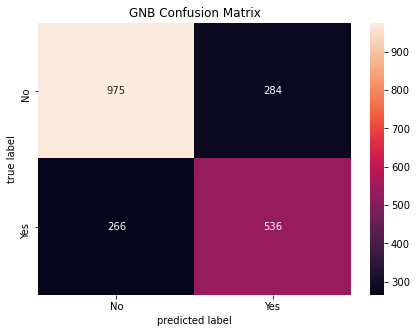

In [215]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(gnb_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('GNB Confusion Matrix')

### Logistic Regression

In [193]:
import sklearn.metrics as skm

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
lr = LogisticRegression(C=0.01, solver='newton-cg')

In [196]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [197]:
preds = lr.predict(X_test)

In [198]:
print("Logistic Regression results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

Logistic Regression results:
Accuracy:  75.21%
Precision: 75.02%
Recall:    75.21%
F1-Score:  74.4%


<AxesSubplot:>

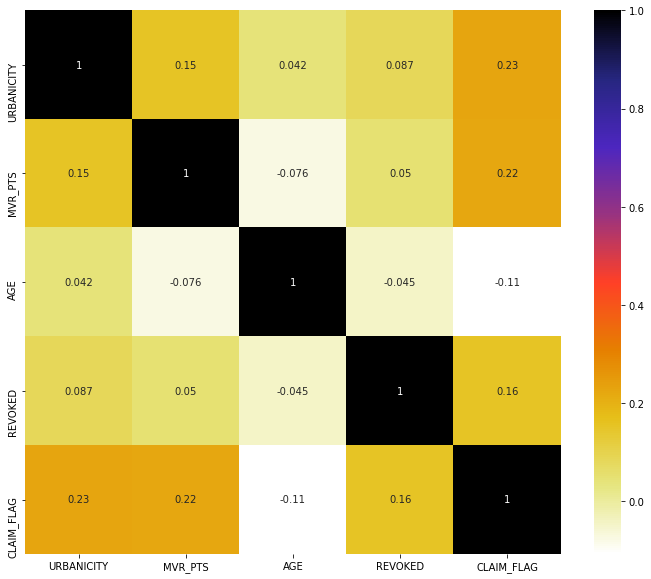

In [199]:
#import seaborn as snsx
X.corr()
plt.figure(figsize=(12,10))

sns.heatmap(X.corr(),annot=True,cmap = plt.cm.CMRmap_r)

In [200]:
lr_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1.0, 'LR Confusion Matrix')

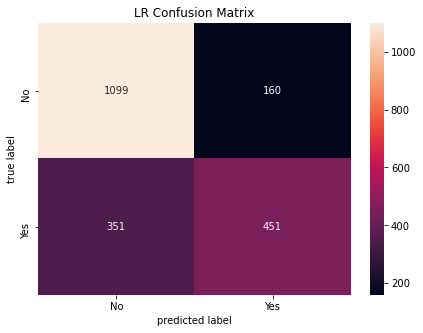

In [201]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(lr_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('LR Confusion Matrix')

### SVM

In [216]:
from sklearn.svm import SVC

In [217]:
svc = SVC(C=0.1, 
          kernel='rbf', 
          gamma='auto', 
         )

In [218]:
svc.fit(X_train, y_train)

SVC(C=0.1, gamma='auto')

In [219]:
preds = svc.predict(X_test)

In [220]:
print("SVM results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

SVM results:
Accuracy:  75.25%
Precision: 75.26%
Recall:    75.25%
F1-Score:  74.26%


In [221]:
svc_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1.0, 'SVM Confusion Matrix')

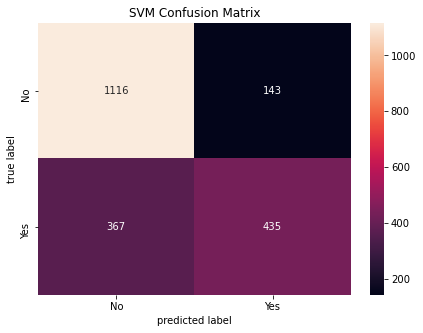

In [222]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(svc_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('SVM Confusion Matrix')

### Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfc = RandomForestClassifier(n_estimators=100)

In [204]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
preds = rfc.predict(X_test)

In [206]:
print("RFC results:")
print("Accuracy:  " + str(round(skm.accuracy_score(y_true=y_test,y_pred=preds) * 100, 2)) + "%")
print("Precision: " + str(round(skm.precision_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("Recall:    " + str(round(skm.recall_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")
print("F1-Score:  " + str(round(skm.f1_score(y_true=y_test,y_pred=preds,average='weighted') * 100, 2)) + "%")

RFC results:
Accuracy:  72.78%
Precision: 72.32%
Recall:    72.78%
F1-Score:  72.14%


In [207]:
rfc_cfmat = skm.confusion_matrix(
    y_true=y_test,
    y_pred=preds)

Text(0.5, 1.0, 'RFC Confusion Matrix')

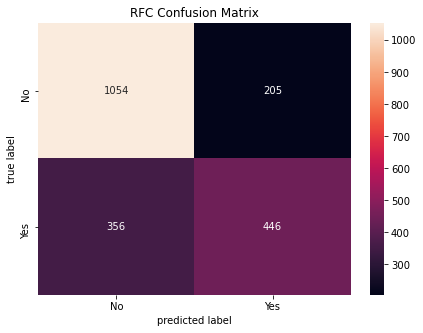

In [208]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(rfc_cfmat, 
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'],
            annot=True,
            fmt='g')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('RFC Confusion Matrix')

### Final product is a model which takes in # of Demerit Points(MVR_PTS), Age, Car Crash Status(CLM_FLAG), and Urbanicity and predicts with 75.35% accuracy whether a customer will make more than one insurance claim.